In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Statistics on comments

In [3]:
#read comments stored in multiple csv files in a folder and concat them all in one df. Remove duplicates if there are any.

In [4]:
def read_folder(csv_folder):
    ''' Input is a folder with csv files; return list of data frames.'''
    csv_folder = Path(csv_folder).absolute()
    csv_files = [f for f in csv_folder.iterdir() if f.name.endswith('csv')]
    # the assign() method adds a helper column
    dfs = [
        pd.read_csv(csv_file)for idx, csv_file in enumerate(csv_files, 1)
    ]
    return dfs

In [5]:
def concat_csv_files(folder_name='data_raw/comments'):
    dfs = read_folder(folder_name)
    all_comments_df = pd.DataFrame()
    for df in dfs:
        df = df.drop(['Unnamed: 0'], axis=1)
        all_comments_df = pd.concat([all_comments_df, df]).drop_duplicates().reset_index(drop=True) 
    return all_comments_df

In [6]:
all_comments_df = concat_csv_files()

In [7]:
all_comments_df.shape

(384758, 12)

In [8]:
all_comments_df.head()

,id,replyCount,likeCount,published_at,author_name,text,authorChannelId,is_reply,threadId,video_id,video_published_at,search_term
0,UgywNFvDx6m3xktYSk94AaABAg,500.0,156044.0,2018-02-28 20:58:58,Prince Ea,What steps are you taking to help fight climate change?,UCDgUAAHgsV2fFZQm2fIWBnA,0.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN
1,UgywNFvDx6m3xktYSk94AaABAg.8dDnrTKvSnb9JDNIoqHA8G,NaN,0.0,2021-02-01 11:28:07,Just drink bleach,h,UC03tXMLELmpXAjZtJ-uKgPw,1.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN
2,UgywNFvDx6m3xktYSk94AaABAg.8dDnrTKvSnb9IyLzqc-h52,NaN,0.0,2021-01-26 06:08:48,janvi selokar,What is the solution of these problems ........ We have to find solutions instead of talking about problem,UChqrKXpAUcqSsdg6nIg4BOA,1.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN
3,UgywNFvDx6m3xktYSk94AaABAg.8dDnrTKvSnb9HSLkZuhk6z,NaN,1.0,2020-12-19 14:00:23,RangeBlox,Hi,UCzvVfRELHQVyiUrwg6bLH9Q,1.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN
4,UgywNFvDx6m3xktYSk94AaABAg.8dDnrTKvSnb9HNxmpcfjeF,NaN,1.0,2020-12-17 21:05:16,scorpionrealms,I'm 500 retards,UCqc926XzPh7kCtdpv_aFZcw,1.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN


In [7]:
all_comments_df.shape

(230599, 12)

In [9]:
def stats(name_csv_or_df: "pd.DataFrame or str") -> pd.DataFrame:
    """
    Creates basic statistics for a given DataFrame or csv file.
    """
    if(isinstance(name_csv_or_df, str)):
        df = pd.read_csv('data_raw/' + name_csv_or_df)
        name = name_csv_or_df
    elif(isinstance(name_csv_or_df, pd.DataFrame)):
        df = name_csv_or_df
        name = None
    else:
        raise TypeError("stats() takes pandas.DataFrame or string as input.")
        
    num_comments = df.shape[0]
    num_authors = len(df.authorChannelId.value_counts())
    num_single_comment_authors = sum(df.authorChannelId.value_counts()==1)
    return pd.DataFrame([[name, num_comments, num_authors, num_single_comment_authors, num_comments/num_authors, df.authorChannelId.value_counts()[0], df.authorChannelId.value_counts().index[0]]], columns=["csv_name", "number_comments", "number_authors", "number_single_comment_authors", "average_comment_count", "most_comments", "user_with_most_comments"]) 

In [46]:
sum(all_comments_df.authorChannelId.value_counts()>30)

66

In [10]:
stat = stats(all_comments_df)

In [11]:
stat

,csv_name,number_comments,number_authors,number_single_comment_authors,average_comment_count,most_comments,user_with_most_comments
0,None,384758,258105,209185,1.490703,453,UC-NmIvin1ZbX4TfZLS9ZHMg


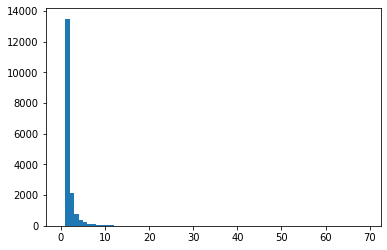

In [11]:
hist = plt.hist(all_comments_df.author_name.value_counts(), bins=[i for i in range(stat.most_comments[0])] )

In [12]:
df = all_comments_df
g = df.groupby(["author_name", "text"]).size().reset_index()
g[g[0]>10]

,author_name,text,0
4461,A mans shed,NO,11
34927,Bernard Blankson,"Revelation 14:6 And I saw another angel fly in the midst of heaven, having the everlasting gospel to preach unto them that dwell on the earth, and to every nation, and kindred, and tongue, and people,\nRevelation 14:7 Saying with a loud voice, Fear God, and give glory to him; for the hour of his judgment is come: and worship him that made heaven, and earth, and the sea, and the fountains of waters.\nRevelation 14:8 And there followed another angel, saying, Babylon is fallen, is fallen, that great city, because she made all nations drink of the wine of the wrath of her fornication.\nRevelation 14:9 And the third angel followed them, saying with a loud voice, If any man worship the beast and his image, and receive his mark in his forehead, or in his hand,\nRevelation 14:10 The same shall drink of the wine of the wrath of God, which is poured out without mixture into the cup of his indignation; and he shall be tormented with fire and brimstone in the presence of the holy angels, and in the presence of the Lamb:\nRevelation 14:11 And the smoke of their torment ascendeth up for ever and ever: and they have no rest day nor night, who worship the beast and his image, and whosoever receiveth the mark of his name.\nRevelation 14:12 Here is the patience of the saints: here are they that keep the commandments of God, and the faith of Jesus.",20
39939,Bolt LP,This is unrelated but can you comment In this video A in brackets like this: [A] would be greatly appreciated! https://youtu.be/PRQP-UPy6cQ,13
58736,Coco brt,this video shows the evolution of carbon dioxide from 1960 to 2019 https://www.youtube.com/watch?v=Lt_Pq13phGY&t=25s,12
70616,Darren's General Info,Fun fact: Bees can fly higher than Mount Everest I have made a video dedicated to fun facts,13
86165,Edward L.,"If John, the traitor, Kerry and dementia Joe Biden agree on a plan....you can bet it is BAD for Americans!! When Kerry said the that most pollution is not from USA but we have to fight it on a ""global scale"" and that means YOU will pay for it globally! When John the traitor talks about USA global finance plan, he means Wealth redistribution on a major scale!! That's YOUR wealth!! You have to read between the lines with political CRIMINALS when they speak!",15
94241,Exemplary Nature,"https://youtu.be/mLEpzTRKZs8 Save environment save earth, Please watch my video to see the face of Nature.",11
114092,HOLYbots,e,24
125863,Infinite Waters (Diving Deep),You are appreciated :),48
144963,John P,Idiot,17


In [ ]:
g = df.groupby(["author_name", "video_id"]).size().reset_index()
g[g[0]>10]

In [ ]:
# Look closer at one comment. All posted by the same user:
df[df.text=="Big Guy and  his side kick Kamel toe Harris making CHINA Great again ...."]

In [ ]:
df[df.text=="planet will warm up and it will be Paradise time again"]

In [13]:
# Users who commented under more than a single video:
g = all_comments_df.groupby(["authorChannelId"])["video_id"].nunique().reset_index()
#g[g.video_id>1]

In [15]:
g[g.video_id>5]

,authorChannelId,video_id
1576,UC-NmIvin1ZbX4TfZLS9ZHMg,14
3457,UC-qdANirYYnn00evmcJzhug,7
5998,UC0TPdvG3xiLwzMJbdJzNw5g,11
12235,UC1yZIJc7dMSHAbQuoVofyTQ,8
14799,UC2cBoDJKBijq614pl9wcyCA,6
16047,UC2w7MEK0MPtKNpxYHrW9W4A,6
18317,UC3V5B9tf9zPyBJahe09O0ag,6
19050,UC3fTGyMjeO3c-IefcpW7RWg,6
19280,UC3jQ7kTogiq-4rQF06ld0lA,6
24290,UC4yxhn4zfOar7y7WiikXwRg,8


In [29]:
g[g.video_id>5]

,author_name,text,video_id
150719,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",6


In [16]:
df[df.authorChannelId=="UCTjA6jHHcAVRQY2dJSHscaQ"]

,id,replyCount,likeCount,published_at,author_name,text,authorChannelId,is_reply,threadId,video_id,video_published_at,search_term
184300,Ugz4NMatGtdqUx8N5O14AaABAg,0.0,0.0,2020-01-16T02:53:33Z,Kloko Loko,"USA should be example because CO2 from USA is highest when you include all history when it was started, from 1750 year. US is country with highest CO2 budget in history of mankind!",UCTjA6jHHcAVRQY2dJSHscaQ,1.0,Ugz4NMatGtdqUx8N5O14AaABAg,IQpIVsxx014,2019-09-26T00:55:41Z,climate crisis
192003,UgxKcLnKGQp6QcyWivd4AaABAg,0.0,0.0,2021-01-03T13:03:51Z,Kloko Loko,@Hank Justice Just just spreading misinformation..,UCTjA6jHHcAVRQY2dJSHscaQ,1.0,UgxKcLnKGQp6QcyWivd4AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis
192004,UgxKcLnKGQp6QcyWivd4AaABAg,0.0,1.0,2021-01-03T13:03:20Z,Kloko Loko,@AQuietNight Volcano eruptions is less than 1% CO2 contribution.,UCTjA6jHHcAVRQY2dJSHscaQ,1.0,UgxKcLnKGQp6QcyWivd4AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis
192007,UgxKcLnKGQp6QcyWivd4AaABAg,0.0,1.0,2021-01-01T13:50:33Z,Kloko Loko,"""The IPCC has officially stated that CO2 is not a major player in global warming.""\n\nThis simply is not true, they say that CO2 IS major contribution to this warming.\n\nYou are just contrarian.",UCTjA6jHHcAVRQY2dJSHscaQ,1.0,UgxKcLnKGQp6QcyWivd4AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis
192009,UgwNJ_hjehoyc8epNVF4AaABAg,0.0,0.0,2021-01-01T13:52:41Z,Kloko Loko,"NO, look slow motion",UCTjA6jHHcAVRQY2dJSHscaQ,1.0,UgwNJ_hjehoyc8epNVF4AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis
192017,UgzXL-AumuRdjL6-wK14AaABAg,0.0,1.0,2021-01-02T10:51:55Z,Kloko Loko,@amoskowitz0103You probably working in coal mine in Poland.\n\nYou can also say that heroin is good because it make you good when you use it.,UCTjA6jHHcAVRQY2dJSHscaQ,1.0,UgzXL-AumuRdjL6-wK14AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis
192019,UgzXL-AumuRdjL6-wK14AaABAg,0.0,1.0,2021-01-01T13:54:55Z,Kloko Loko,And you are climate scientist?\nSo we didn't increase CO2 from 275ppm in year 1700 to today 415ppm?\nExactly 50% more in 320 years.,UCTjA6jHHcAVRQY2dJSHscaQ,1.0,UgzXL-AumuRdjL6-wK14AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis
192026,UgzYRY8TKtuCtO01PN94AaABAg,2.0,0.0,2020-12-31T21:37:21Z,Kloko Loko,Climate deniers are prisoners of their own lies.,UCTjA6jHHcAVRQY2dJSHscaQ,0.0,UgzYRY8TKtuCtO01PN94AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis
192034,Ugzpxz5h8QbomOOlE9N4AaABAg,0.0,0.0,2021-01-01T02:22:45Z,Kloko Loko,Sun was 30% less strong 3 billions years ago..,UCTjA6jHHcAVRQY2dJSHscaQ,1.0,Ugzpxz5h8QbomOOlE9N4AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis
192186,Ugzg5Q2mPRRsJle9B714AaABAg,0.0,0.0,2021-01-01T20:01:41Z,Kloko Loko,"@Johnny Jones Yes, I can.\nIn 2014 here at my place we had major flood that devastated community .\nNow population here is 40%.\nExpert said that is 1 in 1000 years and that global warming was major cause of this flood.\n\nLast winter we didn't have snow at at and we have it every winter, less and less common last 20 years.\nSo far no snow at all this year.\nWinters are much warmer 2°C here.",UCTjA6jHHcAVRQY2dJSHscaQ,1.0,Ugzg5Q2mPRRsJle9B714AaABAg,f1rxv1yPQrc,2020-12-20T17:00:30Z,climate crisis


In [31]:
df[df.author_name=="Sam Lair"]

,id,threadId,published_at,author_name,text,likeCount,is_reply,cleaned,video_id,video_published_at
10181,UgzQ76ASEto9SR9kT8B4AaABAg,UgzQ76ASEto9SR9kT8B4AaABAg,2019-12-25T18:11:28Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",0.0,0.0,NaN,MIA_1xQc7x8,NaN
11520,UgyzXi6LCJ8EuJx2Hs14AaABAg,UgyzXi6LCJ8EuJx2Hs14AaABAg,2020-02-05T20:14:31Z,Sam Lair,"What if global warming is a hoax and we create a better world for nothing; but, what it isn’t a hoax and we do nothing.",0.0,0.0,NaN,bvutiLuch_E,NaN
12701,UgwB1Lxqj4AW2qDIDgV4AaABAg,UgwB1Lxqj4AW2qDIDgV4AaABAg,2019-12-25T18:11:04Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",0.0,0.0,NaN,3tnDjCA4peY,NaN
13477,UgyZfIGiXiaFRfbJ_9B4AaABAg,UgyZfIGiXiaFRfbJ_9B4AaABAg,2020-11-12T19:52:05Z,Sam Lair,Overpopulation and overconsumption fueled by fossil fuels will only decrease when events occur on a wide enough scale to dramatically and permanently curtail various greenhouse gas emissions. \nhttps://samslair.blogspot.com/2020/07/agw-is-sanity-even-possible.html?m=1,0.0,0.0,NaN,1DdfNU5iATU,NaN
13535,UgzkozbBDQtwl2wMi554AaABAg,UgzkozbBDQtwl2wMi554AaABAg,2019-12-25T18:05:56Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly perceived as the Great Satan for blocking international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",0.0,0.0,NaN,1DdfNU5iATU,NaN
14799,UgzmBk8BnapBMs4CtSN4AaABAg,UgzmBk8BnapBMs4CtSN4AaABAg,2019-12-25T18:19:49Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",2.0,0.0,NaN,YwmrYeDZp5M,NaN
14921,UgxKhGoTdT_40833R054AaABAg,UgxKhGoTdT_40833R054AaABAg,2019-12-25T18:28:58Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be 

In [28]:
df.video_id.value_counts().to_csv("video_ids.csv")

In [31]:
df[df.author_name=="amf"].text.iloc[0]

'Would you bet your paycheck on a weather forecast for tomorrow? If not, then why should this country bet billions on global warming predictions that have even less foundation?'

In [32]:
df[df.author_name=="amf"].text.iloc[-1]

'Joe Biden once called state-mandated school integration “the most racist concept you can come up with,” and Barack Obama “the first sort of mainstream African American who is articulate and bright and clean.” He was a staunch opponent of “forced busing” in the 1970s, and leading crusader for mass incarceration throughout the ‘80s and ‘90s. Uncle Joe has described African-American felons as “predators” too sociopathic to rehabilitate — and white supremacist senators as his friends.⬅'

In [62]:
df[df.author_name=='reference2me']

,id,replyCount,likeCount,published_at,author_name,text,authorChannelId,is_reply,threadId,video_id,cleaned,video_published_at
165018,UgxN-qaXhFpdUvcf7Nh4AaABAg,NaN,0.0,2019-05-25T05:30:12Z,reference2me,Al Gore made a BILLION dollars with Cap and Trade ... he should go and enjoy it ...,NaN,1.0,UgxN-qaXhFpdUvcf7Nh4AaABAg,cVkAsPizAbU,NaN,NaN
165240,UgzYZGNlKlMMRWPzU6J4AaABAg,NaN,3.0,2018-04-03T09:51:59Z,reference2me,Al Gore made a billion dollars with Cap and Trade .... Tax payers tax money,NaN,1.0,UgzYZGNlKlMMRWPzU6J4AaABAg,cVkAsPizAbU,NaN,NaN
165241,UgzYZGNlKlMMRWPzU6J4AaABAg,NaN,2.0,2018-04-03T09:48:29Z,reference2me,Al Gore made a billion dollars with Cap and Trade ... it's always about money ...,NaN,1.0,UgzYZGNlKlMMRWPzU6J4AaABAg,cVkAsPizAbU,NaN,NaN
211861,Ugh8Fq9JZ-QhNHgCoAEC,NaN,0.0,2017-06-01T14:35:41Z,reference2me,to many big companies get subsidies to let this go .... the tax payers are the big losers... again,NaN,0.0,Ugh8Fq9JZ-QhNHgCoAEC,eIJ_sxzUZuI,NaN,NaN
213106,UgijC3pKT5jZWXgCoAEC,NaN,0.0,2020-11-24T22:30:59Z,reference2me,yeah ... the bill goes to America ....,NaN,1.0,UgijC3pKT5jZWXgCoAEC,MIA_1xQc7x8,NaN,NaN
214354,Ugi5DxYircYHpHgCoAEC,NaN,0.0,2017-06-04T01:56:18Z,reference2me,I have lived in Florida the past 35 years ... close to the ocean ....I have Not seen a temperature change or the ocean shore moving .... we are at the end of an ice age and in 100 or so years the world should look like it did before the ice age ...which is not that much different than now ...,NaN,0.0,Ugi5DxYircYHpHgCoAEC,bvutiLuch_E,NaN,NaN
215999,UgysnlK5Pb-Jd8y-xkh4AaABAg,NaN,4.0,2020-11-24T22:27:37Z,reference2me,Check out the Paris agreement yourself ... the USA gets the bill and the money goes to the Africa elite ...,NaN,0.0,UgysnlK5Pb-Jd8y-xkh4AaABAg,HzLEYJE33ww,NaN,NaN
218026,UgwRJjGTaYiTG9BPzWB4AaABAg,NaN,0.0,2018-03-27T13:16:40Z,reference2me,Map at 5:53 is Before the ice age ...we are now at the end of an ice age and when all the ice has melted it will look again like it did Before the ice age ... yes we will lose below sea level land ... most of the bottom part of Florida is swamp land now...,NaN,0.0,UgwRJjGTaYiTG9BPzWB4AaABAg,Sr2J_1J9w3A,NaN,NaN
219221,UgjrdvYR6O8VVngCoAEC,NaN,0.0,2018-03-27T13:42:39Z,reference2me,phones are computers now ....how much did you pay for your computer?,NaN,1.0,UgjrdvYR6O8VVngCoAEC,Sr2J_1J9w3A,NaN,NaN
223529,UgiKRIpNLleqo3gCoAEC,NaN,0.0,2017-01-31T15:39:25Z,reference2me,"Money rules ... I was involved in a think tank in Hartford Conn. years ago and at he end filled out a form of questions ... the last question was ...""What else can we tax?""",NaN,0.0,UgiKRIpNLleqo3gCoAEC,47bNzLj5E_Q,NaN,NaN


In [8]:
df = pd.read_csv("summery_vid_lists/2021-03-14-23-10-24_master_video_list_above_5000.csv", sep='\t')

In [ ]:
df = pd.read_csv("data_raw/comments/videoinfo_MIA_1xQc7x8_2021_01_20-12_13_25_comments.csv")
df

In [5]:
df[df.videoId=='dSu5sXmsur4']

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,tags,videoCategoryId,...,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,search_Term,Comments_Downloaded,Comments_Downloaded_Stopped_At
45,439,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,dSu5sXmsur4,2020-10-27T15:00:02Z,2020-10-27 15:00:02,Geoengineering: A Horrible Idea We Might Have ...,To support Kurzgesagt and learn more about Bri...,"Geoengeneering,climate change,climate crisis,c...",27,...,https://i.ytimg.com/vi/dSu5sXmsur4/maxresdefau...,1.0,4866334,281750.0,6292.0,0,20270.0,climate crisis,True,0


In [12]:
df[df.Comments_Downloaded==False]

position                 channelId                channelTitle  \
0        415  UC34wpCgr3l9cG0RtFdTTS-Q                      Gojira   
1        296  UCIHdDJ0tjn_3j-FS7s_X1kQ               Valuetainment   
2        480  UC-xwwLWkh1Ypt90iJ7BvBew                   Deepto TV   
3        232  UC1yNl2E66ZzKApQdRuTQ4tw         Sabine Hossenfelder   
4        309  UCz1oFxMrgrQ82-276UCOU9w                   Atlas Pro   
5         75  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
6         69  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
7        247  UC2PA-AKmVpU6NKCGtZq_rKQ             Philosophy Tube   
8        158  UCRRr_xrOm66qaigIbwFLvbQ                 Simon Clark   
9        445  UCKRoXz3hHAu2XL_k3Ef4vJQ               Crooked Media   
10       198  UCIRYBXDze5krPDzAEOxFGVA               Guardian News   
11       417  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
12       153  UCH4BNI0-FOK2dMXoFtViWHw       It's Okay To Be Smart   
13        55  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
14         6  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
15       200  UCP5tjEmvPItGyLhmjdwP7Ww                RealLifeLore   
16       494  UCpVm7bg6pXKo1Pr6k5kxG9A         National Geographic   
17        59  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
18        73  UCHnyfMqiRRG1u-2MsSQLbXA                  Veritasium   
19       375  UCZrXbiKCUkRNd0Dgn3sDXqw                Mallen Baker   
20       281  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
21       406  UCjo1uN-aM3rmBV46xj7l2KA                John Stossel   
22       223  UCDGECor7yw2AkrgAcHkcJxQ                  The Nation   
23       453  UC_egdS4871949youPFyvW_A                         CDN   
24       308  UC8p1vwvWtl6T73JiExfWs1g                    CBS News   
25       102  UCH4BNI0-FOK2dMXoFtViWHw       It's Okay To Be Smart   
26       312  UCupvZG-5ko_eiXAupbDfxWw                         CNN   
27       278  UCupvZG-5ko_eiXAupbDfxWw                         CNN   
28       160  UCZYTClx2T1of7BRZ86-8fow                     SciShow   
29       252  UCb0xfM3HGOsqPYNAocXXNAQ                       truTV   
30       245  UCupvZG-5ko_eiXAupbDfxWw                         CNN   
31        56  UC3XTzVzaHQEd30rQbuvCtTQ             LastWeekTonight   
32       496  UCpVm7bg6pXKo1Pr6k5kxG9A         National Geographic   
33       319  UCBR8-60-B28hp2BmDPdntcQ                     YouTube   
34       457  UCNvsIonJdJ5E4EXMa65VYpA                ContraPoints   
35       239  UCJjSDX-jUChzOEyok9XYRJQ                     Jubilee   
36       498  UCpQLC-evmUAon9BBpcW4kYg                 Steve Cutts   
37        99  UC-wBAxgUX9P0fXZ6-D0frRA           Isaac Butterfield   
38       475  UCLXo7UDZvByw2ixzpQCufnA                         Vox   
39        51  UCC552Sd-3nyi_tk2BudLUzA                 AsapSCIENCE   
40       251  UC-2YHgc363EdcusLIBbgxzg                   Joe Scott   
41       446  UCR1IuLEqb6UEA_zQ81kwXfg            Real Engineering   
42       236  UCFLwN7vRu8M057qJF8TsBaA                 UpIsNotJump   
43        71  UCpVm7bg6pXKo1Pr6k5kxG9A         National Geographic   
44       442  UClt01z1wHHT7c5lKcU8pxRQ                  hbomberguy   
46       157  UCJjSDX-jUChzOEyok9XYRJQ                     Jubilee   
47       181  UCupvZG-5ko_eiXAupbDfxWw                         CNN   
49       119  UCHnyfMqiRRG1u-2MsSQLbXA                  Veritasium   
52        31  UCsXVk37bltHxD1rDPwtNM8Q  Kurzgesagt – In a Nutshell   
53       262  UCiGm_E4ZwYSHV3bcW1pnSeQ               Billie Eilish   
54        90  UCulYu1HEIa7f70L2lYZWHOw          michaeljacksonVEVO   

        videoId           publishedAt       publishedAtSQL  \
0   8DiWzvE52ZY  2018-06-25T15:55:41Z  2018-06-25 15:55:41   
1   ga-RBuhcJ7w  2019-11-19T18:07:54Z  2019-11-19 18:07:54   
2   tMw-vA12d0Y  2019-12-21T07:20:26Z  2019-12-21 07:20:26   
3   -fkCo_trbT8  2019-11-15T15:44:32Z  2019-11-15 15:44:32   
4   yyAuWeoTm2s  2019-06-03T12:00:16Z  2019-06-03 12: